In [1]:
import datetime

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
events = pd.read_csv("/home/jpivarski/storage/histogram-repos/histogram-activity.csv")
events["package"] = events["package"].replace({
    "histogram": "Boost/hist/mplhep", "boost-histogram": "Boost/hist/mplhep", "hist": "Boost/hist/mplhep", "mplhep": "Boost/hist/mplhep",
    "histogrammar-python": "Histogrammar",
    "histbook": "HistBook",
    "plothon": "Plothon",
    "qhist": "QHist",
    "root": "ROOT histograms",
    "rootpy": "rootpy histograms",
    "svgfig": "SVGFig",
    "yoda": "YODA",
    "coffea": "Coffea",
    "simplehistogram": "SimpleHist",
    "physt": "Physt",
})
events["date"] = pd.to_datetime(events["date"], unit="s")
events["lines changed"] = events["insertions"] + events["deletions"]
unindexed_events = events
events = events.set_index(["package", "date"])
events

author  \
package         date                                           
SimpleHist      2015-03-30 10:59:42      ndevenish@gmail.com   
                2015-03-23 17:37:22      ndevenish@gmail.com   
                2015-03-23 17:36:44      ndevenish@gmail.com   
                2015-03-23 17:36:44      ndevenish@gmail.com   
                2015-03-23 17:36:00      ndevenish@gmail.com   
...                                                      ...   
ROOT histograms 2000-05-16 17:00:58  Fons.Rademakers@cern.ch   
                2000-05-16 17:00:58  Fons.Rademakers@cern.ch   
                2000-05-16 17:00:58  Fons.Rademakers@cern.ch   
                2000-05-16 17:00:58  Fons.Rademakers@cern.ch   
                2000-05-16 17:00:58  Fons.Rademakers@cern.ch   

                                                                 file  \
package         date                                                    
SimpleHist      2015-03-30 10:59:42               simplehist/hists.py   
                2015-03-23 17:37:22           simplehist/converter.py   
                2015-03-23 17:36:44           simplehist/converter.py   
                2015-03-23 17:36:44               simplehist/hists.py   
                2015-03-23 17:36:00            simplehist/__init__.py   
...                                                               ...   
ROOT histograms 2000-05-16 17:00:58             hist/src/TProfile.cxx   
                2000-05-16 17:00:58           hist/src/TProfile2D.cxx   
                2000-05-16 17:00:58  hist/src/TVirtualHistPainter.cxx   
                2000-05-16 17:00:58    histpainter/inc/THistPainter.h   
                2000-05-16 17:00:58  histpainter/src/THistPainter.cxx   

                                     insertions  deletions  lines changed  
package         date                                                       
SimpleHist      2015-03-30 10:59:42           1          1              2  
                2015-03-23 17:37:22           0          7              7  
                2015-03-23 17:36:44          36          4             40  
                2015-03-23 17:36:44          50         14             64  
                2015-03-23 17:36:00           1          1              2  
...                                         ...        ...            ...  
ROOT histograms 2000-05-16 17:00:58         739          0            739  
                2000-05-16 17:00:58         746          0            746  
                2000-05-16 17:00:58          58          0             58  
                2000-05-16 17:00:58          89          0             89  
                2000-05-16 17:00:58        3468          0           3468  

[38646 rows x 5 columns]

Text(0.5, 0, '')

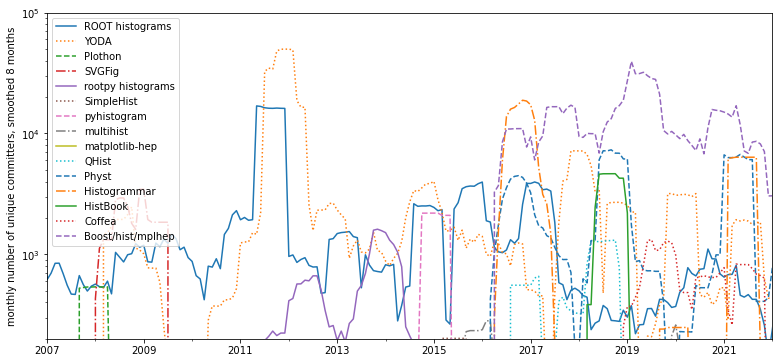

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(13, 6))

tmp = events[["lines changed"]].groupby([pd.Grouper(level="package"), pd.Grouper(level="date", freq="M")]).sum().unstack(level="package").fillna(0)
tmp.columns = [y for x, y in tmp.columns]
tmp[[
    "ROOT histograms",
    "YODA",
    "Plothon",
    "SVGFig",
    "rootpy histograms",
    "SimpleHist",
    "pyhistogram",
    "multihist",
    "matplotlib-hep",
    "QHist",
    "Physt",
    "Histogrammar",
    "HistBook",
    "Coffea",
    "Boost/hist/mplhep",
]].rolling(8).mean().plot(ax=ax, style=["-", ":", "--", "-."] * 5)

ax.set_xlim(datetime.datetime(2007, 1, 1), datetime.datetime(2022, 1, 1))
ax.set_ylim(200, 100000)
ax.set_yscale("log")
ax.set_ylabel("monthly number of unique committers, smoothed 8 months")
ax.set_xlabel("")

In [4]:
c = plt.rcParams["axes.prop_cycle"].by_key()["color"]

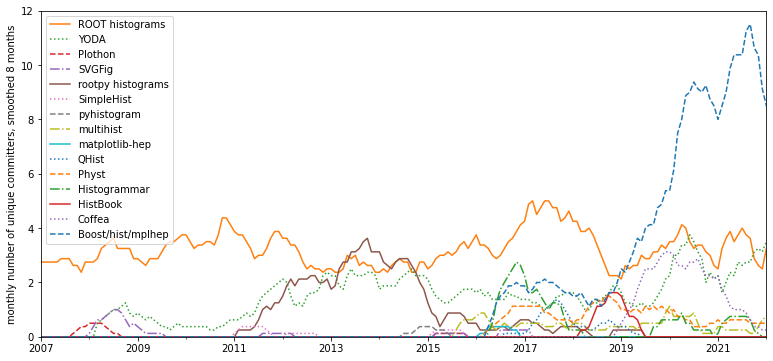

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(13, 6))

tmp = events[["author"]].groupby([pd.Grouper(level="package"), pd.Grouper(level="date", freq="M")]).nunique().unstack(level="package").fillna(0)
tmp.columns = [y for x, y in tmp.columns]
tmp[[
    "ROOT histograms",
    "YODA",
    "Plothon",
    "SVGFig",
    "rootpy histograms",
    "SimpleHist",
    "pyhistogram",
    "multihist",
    "matplotlib-hep",
    "QHist",
    "Physt",
    "Histogrammar",
    "HistBook",
    "Coffea",
    "Boost/hist/mplhep",
]].rolling(8).mean().plot(ax=ax, style=["-", ":", "--", "-."] * 5, color=(c * 2)[1:15] + c[0:1])

ax.set_xlim(datetime.datetime(2007, 1, 1), datetime.datetime(2022, 1, 1))
ax.set_ylim(0, 12)
ax.set_ylabel("monthly number of unique committers, smoothed 8 months")
ax.set_xlabel("")
fig.savefig("PLOTS/github-histogram-libraries.svg")
fig.savefig("PLOTS/github-histogram-libraries.pdf")